In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn
import splitfolders
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

## Prepare Data for Model

In [2]:
# ## Split Folders into Train, Test and Validation sets
# splitfolders.ratio('flowers', output='flowers4', seed=1337, ratio=(0.8, 0.1, 0.1))

In [3]:
## Define directory paths
orig_path = './flowers'
train_dir = './flowers4/train/'
val_dir = './flowers4/val/'
test_dir = './flowers4/test/'

In [4]:
## Files in each of the Original Folders
print(len(os.listdir(orig_path+'/daisy')))
print(len(os.listdir(orig_path+'/dandelion')))
print(len(os.listdir(orig_path+'/rose')))
print(len(os.listdir(orig_path+'/sunflower')))
print(len(os.listdir(orig_path+'/tulip')))

769
1052
784
734
984


In [5]:
## Total Files for Each Flower in Split Folders
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(test_dir+'/daisy')) + len(os.listdir(val_dir+'/daisy')))
print(len(os.listdir(train_dir+'/dandelion')) + len(os.listdir(test_dir+'/dandelion')) + len(os.listdir(val_dir+'/dandelion')))
print(len(os.listdir(train_dir+'/rose')) + len(os.listdir(test_dir+'/rose')) + len(os.listdir(val_dir+'/rose')))
print(len(os.listdir(train_dir+'/sunflower')) + len(os.listdir(test_dir+'/sunflower')) + len(os.listdir(val_dir+'/sunflower')))
print(len(os.listdir(train_dir+'/tulip')) + len(os.listdir(test_dir+'/tulip')) + len(os.listdir(val_dir+'/tulip')))

769
1052
784
734
984


In [6]:
## Total files in Train, Valdation and Test Folders
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(train_dir+'/dandelion')) 
      + len(os.listdir(train_dir+'/rose')) + len(os.listdir(train_dir+'/sunflower')) 
      + len(os.listdir(train_dir+'/tulip')))

print(len(os.listdir(val_dir+'/daisy')) + len(os.listdir(val_dir+'/dandelion')) 
      + len(os.listdir(val_dir+'/rose')) + len(os.listdir(val_dir+'/sunflower')) 
      + len(os.listdir(val_dir+'/tulip')))

print(len(os.listdir(test_dir+'/daisy')) + len(os.listdir(test_dir+'/dandelion')) 
      + len(os.listdir(test_dir+'/rose')) + len(os.listdir(test_dir+'/sunflower')) 
      + len(os.listdir(test_dir+'/tulip')))

3457
430
436


## Preprocess Data

In [7]:
## Image Resize
px = 300

## Batch Size
b = 20

In [27]:
train_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_gen.flow_from_directory(train_dir, target_size = (px, px), 
                                                batch_size = b, class_mode = 'categorical')
val_gen = ImageDataGenerator(rescale=1./255)
val_generator = val_gen.flow_from_directory(val_dir, target_size = (px, px), 
                                            batch_size = b, class_mode = 'categorical')

Found 3457 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [28]:
print(train_generator.classes)

[0 0 0 ... 4 4 4]


In [29]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [31]:
train_len = len(os.listdir(train_dir+'/daisy')) + len(os.listdir(train_dir+'/dandelion')) + len(os.listdir(train_dir+'/rose')) + len(os.listdir(train_dir+'/sunflower')) + len(os.listdir(train_dir+'/tulip'))

val_len = len(os.listdir(val_dir+'/daisy')) + len(os.listdir(val_dir+'/dandelion')) + len(os.listdir(val_dir+'/rose')) + len(os.listdir(val_dir+'/sunflower')) + len(os.listdir(val_dir+'/tulip'))

steps_per_epoch = round(train_len / b)
val_steps = round(val_len / b)

print("Steps Per EPOCH: "+str(steps_per_epoch))
print("Validation Steps: "+str(val_steps))

Steps Per EPOCH: 173
Validation Steps: 22


## Model 1

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (px,px,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(), metrics = ['accuracy'])

history = model.fit(x = train_generator, steps_per_epoch = steps_per_epoch, epochs = 100, 
                    validation_data = val_generator, validation_steps = val_steps)

Epoch 1/100
173/173 [==============================] - 56s 324ms/step - loss: 1.5341 - accuracy: 0.4599 - val_loss: 1.0584 - val_accuracy: 0.5930
Epoch 2/100
173/173 [==============================] - 15s 88ms/step - loss: 1.0136 - accuracy: 0.6063 - val_loss: 0.9248 - val_accuracy: 0.6512
Epoch 3/100
173/173 [==============================] - 15s 88ms/step - loss: 0.8374 - accuracy: 0.6766 - val_loss: 0.8966 - val_accuracy: 0.6930
Epoch 4/100
173/173 [==============================] - 15s 88ms/step - loss: 0.6346 - accuracy: 0.7663 - val_loss: 0.8963 - val_accuracy: 0.6744
Epoch 5/100
173/173 [==============================] - 15s 89ms/step - loss: 0.4463 - accuracy: 0.8484 - val_loss: 1.0270 - val_accuracy: 0.6326
Epoch 6/100
173/173 [==============================] - 15s 87ms/step - loss: 0.2840 - accuracy: 0.9097 - val_loss: 1.3067 - val_accuracy: 0.6674
Epoch 7/100
173/173 [==============================] - 15s 85ms/step - loss: 0.1819 - accuracy: 0.9468 - val_loss: 2.1646 - val_a

173/173 [==============================] - 15s 89ms/step - loss: 0.1242 - accuracy: 0.9925 - val_loss: 16.2181 - val_accuracy: 0.6186
Epoch 58/100
173/173 [==============================] - 16s 90ms/step - loss: 0.0595 - accuracy: 0.9936 - val_loss: 15.7140 - val_accuracy: 0.6093
Epoch 59/100
173/173 [==============================] - 15s 86ms/step - loss: 0.1835 - accuracy: 0.9931 - val_loss: 17.7678 - val_accuracy: 0.6256
Epoch 60/100
173/173 [==============================] - 15s 85ms/step - loss: 0.1360 - accuracy: 0.9902 - val_loss: 26.1413 - val_accuracy: 0.5605
Epoch 61/100
173/173 [==============================] - 15s 85ms/step - loss: 0.1241 - accuracy: 0.9916 - val_loss: 19.8037 - val_accuracy: 0.5884
Epoch 62/100
173/173 [==============================] - 15s 85ms/step - loss: 0.0597 - accuracy: 0.9922 - val_loss: 16.3530 - val_accuracy: 0.6209
Epoch 63/100
173/173 [==============================] - 15s 84ms/step - loss: 0.0613 - accuracy: 0.9951 - val_loss: 25.1821 - val_a

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)      

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
def accuracy_graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [12]:
def accuracy_graph1(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

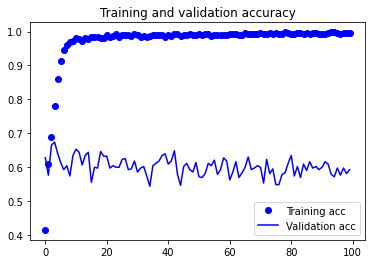

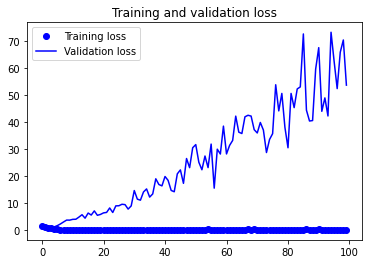

In [13]:
if list(history.history.keys())[1] == 'accuracy':
    accuracy_graph(history)
else:
    accuracy_graph1(history)

## Model 2 (Add Data Augmentation)

In [14]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=5,
                               height_shift_range=2, shear_range=20, 
                               zoom_range=1.1,fill_mode='nearest',
                               horizontal_flip=True, vertical_flip=True)
train_generator = train_gen.flow_from_directory(train_dir, target_size = (px, px), 
                                                batch_size = b, class_mode = 'categorical')
val_gen = ImageDataGenerator(rescale=1./255)
val_generator = val_gen.flow_from_directory(val_dir, target_size = (px, px), 
                                            batch_size = b, class_mode = 'categorical')

Found 3457 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (px,px,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(), metrics = ['accuracy'])

history = model.fit(x = train_generator, steps_per_epoch = steps_per_epoch, epochs = 100, 
                    validation_data = val_generator, validation_steps = val_steps)

Epoch 1/100
173/173 [==============================] - 51s 295ms/step - loss: 1.6589 - accuracy: 0.3856 - val_loss: 1.1402 - val_accuracy: 0.5395
Epoch 2/100
173/173 [==============================] - 51s 293ms/step - loss: 1.1957 - accuracy: 0.5242 - val_loss: 0.9638 - val_accuracy: 0.6233
Epoch 3/100
173/173 [==============================] - 51s 293ms/step - loss: 1.0926 - accuracy: 0.5684 - val_loss: 0.9164 - val_accuracy: 0.6512
Epoch 4/100
173/173 [==============================] - 51s 292ms/step - loss: 1.0417 - accuracy: 0.5950 - val_loss: 0.8465 - val_accuracy: 0.6814
Epoch 5/100
173/173 [==============================] - 51s 292ms/step - loss: 1.0211 - accuracy: 0.6040 - val_loss: 0.8059 - val_accuracy: 0.7140
Epoch 6/100
173/173 [==============================] - 51s 292ms/step - loss: 1.0213 - accuracy: 0.6031 - val_loss: 0.8888 - val_accuracy: 0.6395
Epoch 7/100
173/173 [==============================] - 51s 293ms/step - loss: 0.9696 - accuracy: 0.6231 - val_loss: 0.7679 -

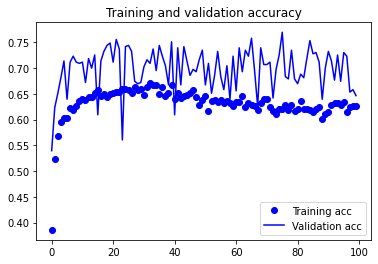

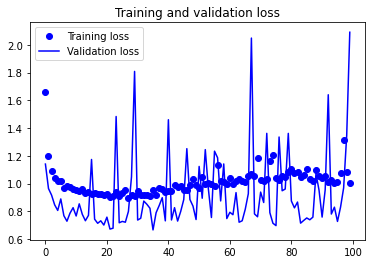

In [19]:
if list(history.history.keys())[1] == 'accuracy':
    accuracy_graph(history)
else:
    accuracy_graph1(history)

## Load Pre Trained Covnet

In [36]:
conv_base = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (px, px, 3))

In [37]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

## Fast Feature Extraction

In [38]:
datagen = ImageDataGenerator(rescale=1./255)

In [39]:
def extract_features(directory, sample_count,lab):
    features = np.zeros(shape=(sample_count, 9, 9, 512))
    labels = np.zeros(shape=(sample_count,lab))
    generator = datagen.flow_from_directory(directory,target_size=(px, px),batch_size=b,class_mode='categorical')

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * b : (i + 1) * b] = features_batch
        labels[i * b : (i + 1) * b] = labels_batch
        i += 1
        if i * b >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [40]:
## Total files in Train, Valdation and Test Folders
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(train_dir+'/dandelion')) 
      + len(os.listdir(train_dir+'/rose')) + len(os.listdir(train_dir+'/sunflower')) 
      + len(os.listdir(train_dir+'/tulip')))

print(len(os.listdir(val_dir+'/daisy')) + len(os.listdir(val_dir+'/dandelion')) 
      + len(os.listdir(val_dir+'/rose')) + len(os.listdir(val_dir+'/sunflower')) 
      + len(os.listdir(val_dir+'/tulip')))

print(len(os.listdir(test_dir+'/daisy')) + len(os.listdir(test_dir+'/dandelion')) 
      + len(os.listdir(test_dir+'/rose')) + len(os.listdir(test_dir+'/sunflower')) 
      + len(os.listdir(test_dir+'/tulip')))

3457
430
436


In [41]:
train_features, train_labels = extract_features(train_dir, 3457,5)
validation_features, validation_labels = extract_features(val_dir,430,5)
test_features, test_labels = extract_features(test_dir, 436,5)

Found 3457 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 436 images belonging to 5 classes.


In [26]:
train_features = np.reshape(train_features, (3457, 9 * 9 * 512))
validation_features = np.reshape(validation_features, (430, 9 * 9 * 512))
test_features = np.reshape(test_features, (436, 9 * 9 * 512))

In [27]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 9 * 9 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=b,
                    validation_data=(validation_features, validation_labels))

C:\Users\AmirSaeed\.conda\envs\amir-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
173/173 [==============================] - 2s 11ms/step - loss: 1.1996 - acc: 0.5181 - val_loss: 0.8241 - val_acc: 0.7070
Epoch 2/100
173/173 [==============================] - 2s 11ms/step - loss: 0.7888 - acc: 0.7223 - val_loss: 0.6983 - val_acc: 0.7419
Epoch 3/100
173/173 [==============================] - 2s 11ms/step - loss: 0.6488 - acc: 0.7689 - val_loss: 0.6770 - val_acc: 0.7651
Epoch 4/100
173/173 [==============================] - 2s 11ms/step - loss: 0.5566 - acc: 0.8068 - val_loss: 0.6133 - val_acc: 0.7744
Epoch 5/100
173/173 [==============================] - 2s 11ms/step - loss: 0.4873 - acc: 0.8322 - val_loss: 0.6070 - val_acc: 0.7651
Epoch 6/100
173/173 [==============================] - 2s 12ms/step - loss: 0.4390 - acc: 0.8612 - val_loss: 0.5771 - val_acc: 0.7884
Epoch 7/100
173/173 [==============================] - 2s 10ms/step - loss: 0.3878 - acc: 0.8785 - val_loss: 0.6087 - val_acc: 0.7651
Epoch 8/100
173/173 [==============================] - 2s 11ms

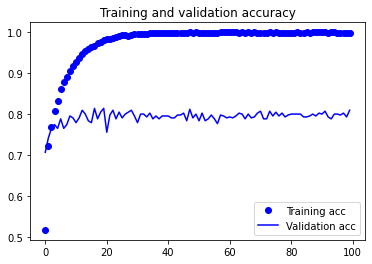

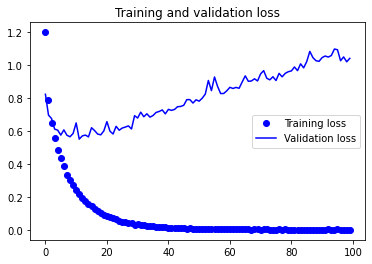

In [28]:
if list(history.history.keys())[1] == 'accuracy':
    accuracy_graph(history)
else:
    accuracy_graph1(history)

## Feature Extraction with Data Augmentation

In [29]:
model = models.Sequential()
model.add(conv_base)  # Adding a densely connected classifier on top of the convolutional base
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 9, 9, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               10617088  
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 30,642,757
Trainable params: 30,642,757
Non-trainable params: 0
_________________________________________________________________


In [31]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 36
This is the number of trainable weights after freezing the conv base: 4


In [32]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150*150
        target_size=(px, px),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(px, px),
        batch_size=20,
        class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=val_steps)

Epoch 1/100
173/173 [==============================] - 60s 345ms/step - loss: 1.1625 - acc: 0.5377 - val_loss: 0.7707 - val_acc: 0.7302
Epoch 2/100
173/173 [==============================] - 60s 346ms/step - loss: 0.8468 - acc: 0.6885 - val_loss: 0.7176 - val_acc: 0.7419
Epoch 3/100
173/173 [==============================] - 59s 342ms/step - loss: 0.7489 - acc: 0.7188 - val_loss: 0.6208 - val_acc: 0.7791
Epoch 4/100
173/173 [==============================] - 60s 343ms/step - loss: 0.6786 - acc: 0.7530 - val_loss: 0.6727 - val_acc: 0.7465
Epoch 5/100
173/173 [==============================] - 60s 348ms/step - loss: 0.6647 - acc: 0.7564 - val_loss: 0.6474 - val_acc: 0.7558
Epoch 6/100
173/173 [==============================] - 59s 342ms/step - loss: 0.6224 - acc: 0.7735 - val_loss: 0.5710 - val_acc: 0.8023
Epoch 7/100
173/173 [==============================] - 59s 338ms/step - loss: 0.6073 - acc: 0.7721 - val_loss: 0.5809 - val_acc: 0.7837
Epoch 8/100
173/173 [===========================

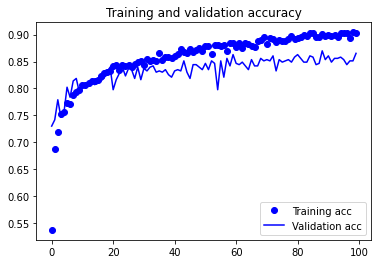

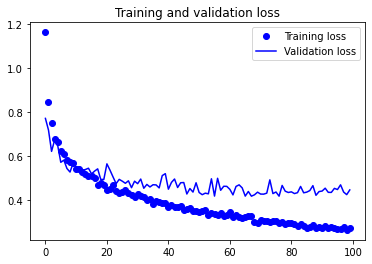

In [34]:
if list(history.history.keys())[1] == 'accuracy':
    accuracy_graph(history)
else:
    accuracy_graph1(history)

## Fine Tuning

In [35]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [36]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [37]:
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=val_steps)

Epoch 1/100
173/173 [==============================] - 61s 346ms/step - loss: 0.3252 - acc: 0.8820 - val_loss: 0.5499 - val_acc: 0.8372
Epoch 2/100
173/173 [==============================] - 60s 344ms/step - loss: 0.2802 - acc: 0.8988 - val_loss: 0.3563 - val_acc: 0.8837
Epoch 3/100
173/173 [==============================] - 60s 344ms/step - loss: 0.2345 - acc: 0.9155 - val_loss: 0.3749 - val_acc: 0.8930
Epoch 4/100
173/173 [==============================] - 60s 343ms/step - loss: 0.2117 - acc: 0.9199 - val_loss: 0.3848 - val_acc: 0.8930
Epoch 5/100
173/173 [==============================] - 60s 344ms/step - loss: 0.2002 - acc: 0.9262 - val_loss: 0.4434 - val_acc: 0.8744
Epoch 6/100
173/173 [==============================] - 60s 344ms/step - loss: 0.2043 - acc: 0.9265 - val_loss: 0.4285 - val_acc: 0.8977
Epoch 7/100
173/173 [==============================] - 60s 344ms/step - loss: 0.1806 - acc: 0.9387 - val_loss: 0.3814 - val_acc: 0.8953
Epoch 8/100
173/173 [===========================

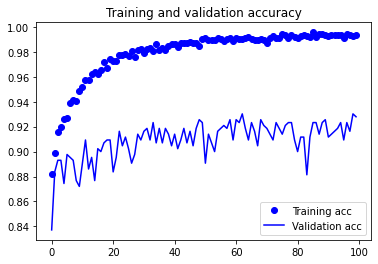

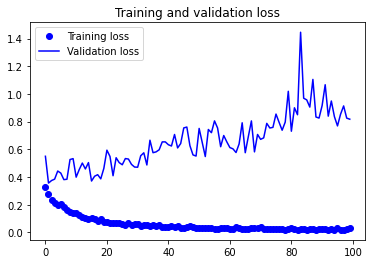

In [39]:
if list(history.history.keys())[1] == 'accuracy':
    accuracy_graph(history)
else:
    accuracy_graph1(history)

In [40]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(px, px),
                                                  batch_size=b,
                                                  class_mode='categorical')

Found 436 images belonging to 5 classes.


In [41]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)

50/50 [==============================] - 6s 110ms/step - loss: 0.7721 - acc: 0.9243


In [42]:
print('test acc:', round(test_acc*100,2))

test acc: 92.43
